In [1]:
import pandas as pd
df = pd.read_csv("/content/emotion.csv")
df.head()

,text,label
0,i didnt feel humiliated,0.0
1,i can go from feeling so hopeless to so damned...,0.0
2,im grabbing a minute to post i feel greedy wrong,3.0
3,i am ever feeling nostalgic about the fireplac...,2.0
4,i am feeling grouchy,3.0


<Axes: xlabel='label', ylabel='count'>

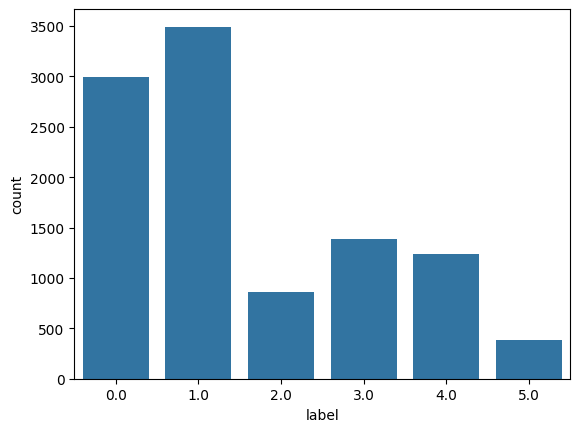

In [2]:
import seaborn as sns

sns.countplot(x=df.label)


In [3]:
df.isna().sum()

,0
text,0
label,1


In [4]:
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x:"".join(x for x in  x.split() if x not in stop))

In [10]:
!pip install textblob

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

X = tfidf.fit_transform(df['text'])

X = X.toarray()

y = df.label.values


In [15]:
try:
    df = pd.read_csv("/content/emotion.csv")
    print("File read successfully")
except Exception as e:
    print(f"Error reading file: {e}")


File read successfully


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,

                                                    shuffle=True, random_state = 0)\


In [19]:
from sklearn.naive_bayes import GaussianNB



#Initialize GaussianNB classifier

model = GaussianNB()

#Fit the model on the train dataset

model = model.fit(X_train, y_train)

#Make predictions on the test dataset

pred = model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

[[249  81  57  93  88  28]
 [171 321  75  64  64  38]
 [ 31  50  57   4  14   7]
 [ 73  34  16 100  36  13]
 [ 51  41  13  22  88  19]
 [ 19  21   1   7   7  17]]


In [23]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# 1. Load and clean the data:
df = pd.read_csv("/content/emotion.csv")
# a. Drop rows with NaN in 'label' column:
df.dropna(subset=['label'], inplace=True)
# b. Optionally handle other missing values if needed:
# df.fillna(method='ffill', inplace=True)  # Example: forward fill
# c. If 'label' is not numerical, convert it:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['label'] = le.fit_transform(df['label'])

# 2. Feature Extraction
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['text']).toarray()
y = df.label.values

# 3. Split the data:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=0
)

# 4. Train and predict:
model = GaussianNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)

# 5. Evaluate:
print(confusion_matrix(y_test, pred))

[[249  81  57  93  88  28]
 [171 321  75  64  64  38]
 [ 31  50  57   4  14   7]
 [ 73  34  16 100  36  13]
 [ 51  41  13  22  88  19]
 [ 19  21   1   7   7  17]]


In [24]:
print(accuracy_score(y_test, pred))

0.40193236714975844


In [25]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.42      0.42      0.42       596
         1.0       0.59      0.44      0.50       733
         2.0       0.26      0.35      0.30       163
         3.0       0.34      0.37      0.36       272
         4.0       0.30      0.38      0.33       234
         5.0       0.14      0.24      0.18        72

    accuracy                           0.40      2070
   macro avg       0.34      0.36      0.35      2070
weighted avg       0.43      0.40      0.41      2070



In [27]:
from sklearn.ensemble import RandomForestClassifier

clf_rf=RandomForestClassifier()



#Train the model using the training sets

clf_rf.fit(X_train,y_train)



rf_pred=clf_rf.predict(X_test).astype(int)

In [28]:
print(confusion_matrix(y_test, rf_pred))

[[511  64   4  10   6   1]
 [ 13 691  10   8   9   2]
 [  3  55 102   0   2   1]
 [ 23  27   3 212   7   0]
 [ 13  22   1   6 176  16]
 [  1   9   1   0   7  54]]


In [29]:
print(accuracy_score(y_test, rf_pred))


0.8434782608695652


In [30]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

lr_pred = logreg.predict(X_test)

In [32]:
print(confusion_matrix(y_test, lr_pred))

[[551  34   2   6   3   0]
 [ 21 702   3   4   0   3]
 [ 10  82  69   0   2   0]
 [ 32  55   0 180   5   0]
 [ 33  50   2   8 137   4]
 [ 12  30   0   0   9  21]]


In [33]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88       596
         1.0       0.74      0.96      0.83       733
         2.0       0.91      0.42      0.58       163
         3.0       0.91      0.66      0.77       272
         4.0       0.88      0.59      0.70       234
         5.0       0.75      0.29      0.42        72

    accuracy                           0.80      2070
   macro avg       0.84      0.64      0.70      2070
weighted avg       0.82      0.80      0.79      2070

